In [56]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
def MA(mu, theta, eps, order):
    T = len(eps)

    res = np.zeros(T)

    for t in range(T):
        if t < order:
            res[t] = mu + eps[t]
        else:
            res[t] = mu + eps[t] + np.dot(theta,eps[t-order:t])
    return res

In [52]:
def ma_neg_log_likelihood(params, X, order):
    mu = params[0]
    theta = params[1:order+1]
    sigma2 = params[-1]**2

    T = len(X)
    eps = np.zeros(T)
    
    for t in range(T):
        if t < order:
            eps[t] = X[t] - mu
        else:
            eps[t] = X[t] - mu - np.dot(theta,eps[t-order:t])
        
    nll = T/2*np.log(2*np.pi*sigma2) + 1/2/sigma2*np.sum(eps**2)

    return nll

In [2]:
x_train = pd.read_csv('./x_train.csv', index_col='ID')
y_train = pd.read_csv('./y_train.csv', index_col='ID')
train = pd.concat([x_train, y_train], axis=1).dropna()
test = pd.read_csv('./x_test.csv', index_col='ID').dropna()

In [19]:
series = x_train[x_train['DATE']==0]
series = series[series['STOCK']==2]
cols_idx = ['RET_%i' % i for i in range(1,21)]
series = series[cols_idx]

In [21]:
series.head()

,RET_1,RET_2,RET_3,RET_4,RET_5,RET_6,RET_7,RET_8,RET_9,RET_10,RET_11,RET_12,RET_13,RET_14,RET_15,RET_16,RET_17,RET_18,RET_19,RET_20
ID,,,,,,,,,,,,,,,,,,,,
0,-0.015748,-0.015504,0.010972,-0.014672,0.016483,0.014331,-0.017215,-0.018433,0.134146,0.182287,0.01357,0.030108,0.027624,-0.04937,-0.028571,0.059459,0.003254,0.008752,-0.012959,-0.002155


In [54]:
order = 5
signal = series.values[0,-order:]
mu = np.mean(signal)
sigma = np.std(signal)
theta = np.random.rand(order)
params = [mu,theta,sigma]

In [55]:
ma_neg_log_likelihood(params,signal,order)

-11.321773296347395

TypeError: object of type 'numpy.float64' has no len()

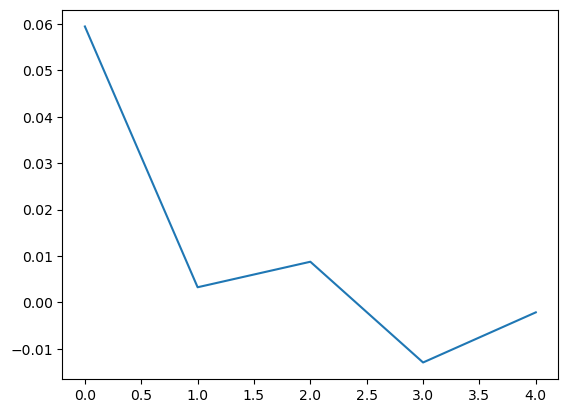

In [58]:
fig, ax = plt.subplots()
ax.plot(signal)
ax.plot(MA(mu, theta, sigma, order))